# Titanic EDA

## 0.5 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the data

In [2]:
df = pd.read_csv("Titanic-Dataset .csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Cleaning the Data

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So we have 177 empty value in the "Age" column and 678 in the "Cabin" column.

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median()) 
# filling na's in the Age column with the median  

In [7]:
print(df['Age'].median())

28.0


In [8]:
df = df.drop(columns=["Cabin"])
# removing the Cabin column since there is a lot of missing values

## 3 Univariate Analysis

### 3.1 Age Distribution 

Text(0.5, 1.0, 'Age Distribution')

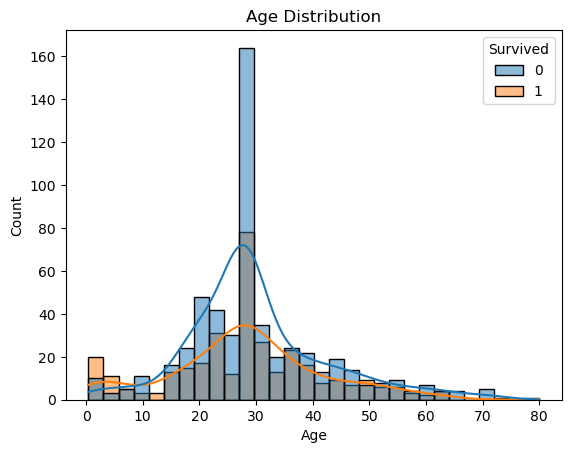

In [43]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title("Age Distribution")

There is an unusual peak in values between 25 and 30, it might be because we filled all na's in age column with the median

## 3.2 Fare distribution

Text(0.5, 1.0, 'Fare Distribution')

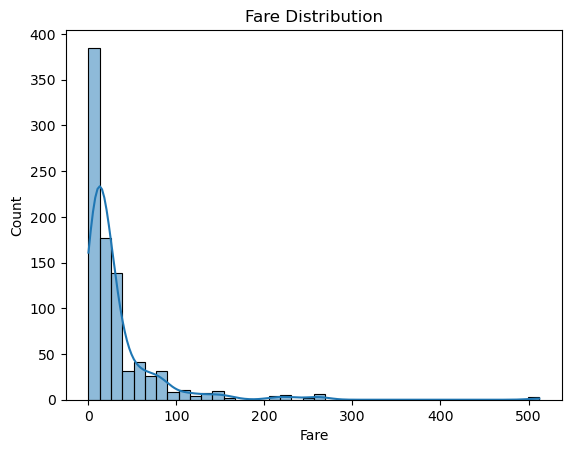

In [47]:
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")

### 3.3 Countplot of the Survived

Text(0.5, 1.0, 'Survival Count')

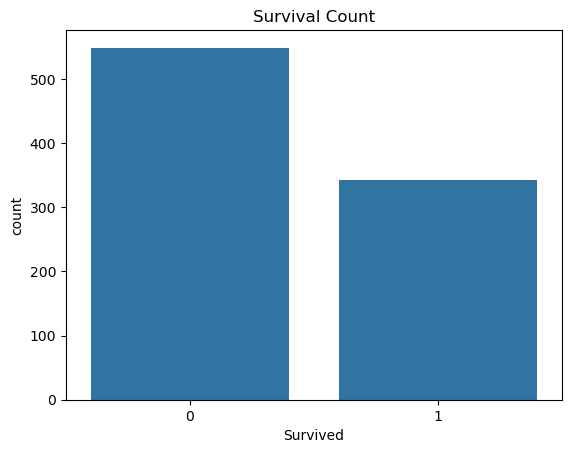

In [33]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")

In [10]:
print(df.Survived.sum()/df.Survived.count())

0.3838383838383838


So we can conclude that only 36.3% have survived the titanic

## 4  Bivariate Analysis (Survival vs. Features)

### 4.1 Survival by Sex

Text(0.5, 1.0, 'Survival by Sex')

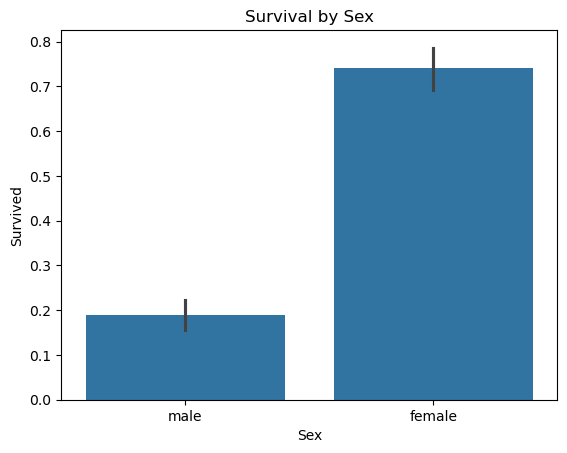

In [36]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival by Sex")

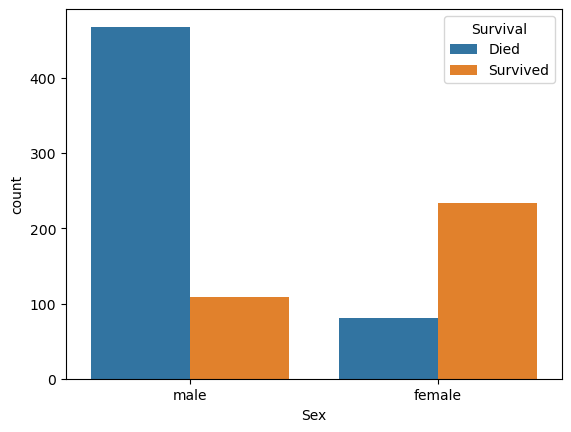

In [38]:
ax = sns.countplot(data=df, x='Sex', hue='Survived')
ax.legend(title='Survival', labels=['Died', 'Survived'])

In [12]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

as we can see, females are more likely to survive than males

### 4.2 Survival by Pclass

Text(0.5, 1.0, 'Survival by Pclass')

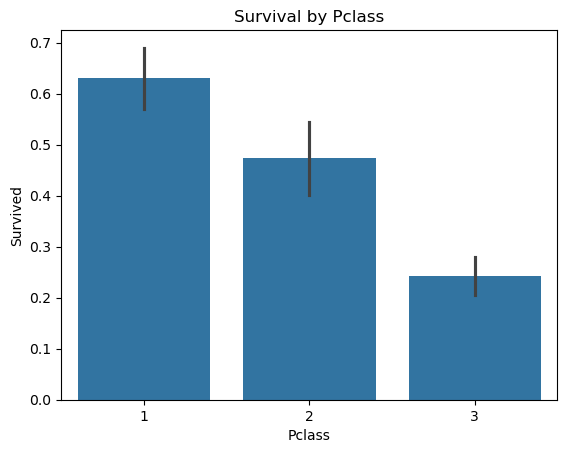

In [41]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival by Pclass")

Higher the Pclass(passenger class), the more chance of survival

## 5. Outlier Detection

### 5.1 Fare outliers

Text(0.5, 1.0, 'Fare Outliers')

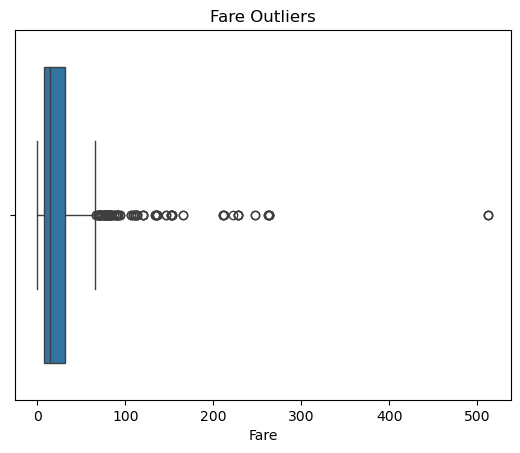

In [48]:
sns.boxplot(x='Fare', data=df)
plt.title("Fare Outliers")

### 5.2 Age outliers

Text(0.5, 1.0, 'Age Outliers')

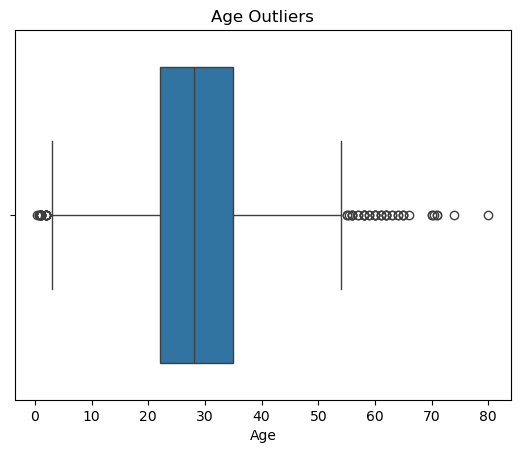

In [49]:
sns.boxplot(x='Age', data=df)
plt.title("Age Outliers")

## 6. Correlation Matrix & Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

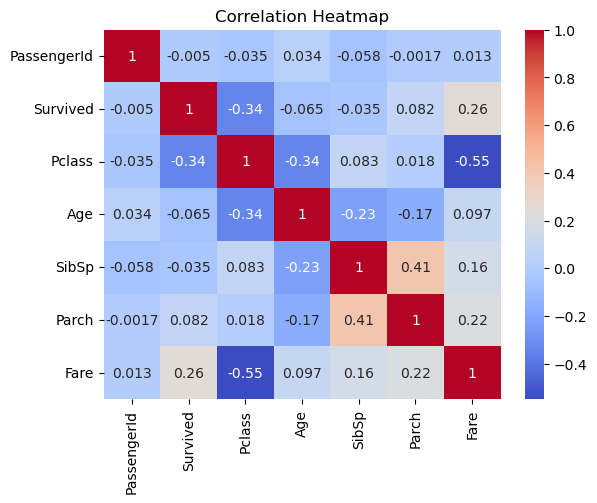

In [57]:
# Selecting only the numeric columns
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

# 7. Summary and Conclusion

* **Gender significantly impacted survival:** Female passengers consistently showed a much higher survival rate compared to males.
* **Passenger class correlated with survival:** Individuals in **1st class** were considerably more likely to survive than those in **2nd or 3rd class**.
* **Fare and survival had a positive link:** A higher fare paid for a ticket appears to correlate with a greater chance of survival. This might be due to the correlation between fare and passenger class or potentially better cabin locations.
* **Age's impact on survival was weak:** While there was a slight negative correlation between age and survival, it suggests that **children might have been prioritized** in rescue efforts.

